<a href="https://colab.research.google.com/github/sonaa-gupta/brain-tumor-dtection-and-segementation/blob/main/braintumor%20segmentation/final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  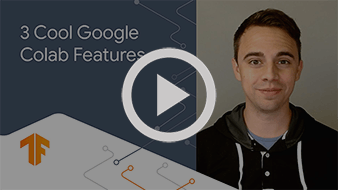
  </a>
</center>

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score
from keras.applications.resnet import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,LambdaCallback
from keras.layers import Input,Dropout, Dense,GlobalAveragePooling2D
from keras.models import Sequential,Model


In [ ]:
import ipywidgets as widgets
import io
import os
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
X_train = []
y_train = []
image_size = 200

In [ ]:
train_path = '/content/drive/MyDrive/brain/Training'
labels = os.listdir(train_path)
print(labels)

['no_tumor', 'meningioma_tumor', 'glioma_tumor', 'pituitary_tumor']


In [ ]:
for i in labels:
    folder_path = os.path.join(train_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))
        
        X_train.append(img)
        y_train.append(i)

In [ ]:
test_path='/content/drive/MyDrive/brain/Testing'

In [ ]:
for i in labels:
    folder_path = os.path.join(test_path, i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.resize(img, (image_size, image_size))
        
        X_train.append(img)
        y_train.append(i)

In [ ]:
X_train[1]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
len(X_train), len(y_train)

(3301, 3301)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
X_train.shape, y_train.shape

((3301, 200, 200, 3), (3301,))

In [ ]:
X_train, y_train = shuffle(X_train, y_train, random_state = 99)
X_train.shape, y_train.shape

((3301, 200, 200, 3), (3301,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state = 100)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))

y_train_new[:5]

[3, 0, 0, 1, 1]

In [ ]:
y_train_new = tf.keras.utils.to_categorical(y_train_new)
y_train_new

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))

y_test_new = tf.keras.utils.to_categorical(y_test_new)
y_test_new

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
net = ResNet50(
    weights='imagenet', # Load weights pre-trained on ImageNet.
     include_top=False, # Do not include the ImageNet classifier at the top.
     input_shape=(image_size,image_size,3))
     

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
import keras
from keras.layers import Input, Dense, Dropout, Activation
from keras.models import Model

model = net.output
model = Dense(2048, activation='selu')(model)
model = Dropout(0.4)(model)
model = Dense(2048, activation='selu')(model)
model = Dropout(0.4)(model)
model = Flatten()(model)
model = Dense(4, activation='sigmoid')(model)
model = Model(inputs= net.input, outputs= model)

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)
mc = ModelCheckpoint(filepath="classifier-resnet-weights.hdf5", verbose=1, save_best_only=True)
H = model.fit(X_train,y_train_new,epochs=90,verbose=1, callbacks=[mc,es])

Epoch 1/90
93/93 [==============================] - ETA: 0s - loss: 0.9315 - accuracy: 0.7923

93/93 [==============================] - 43s 308ms/step - loss: 0.9315 - accuracy: 0.7923
Epoch 2/90
93/93 [==============================] - ETA: 0s - loss: 0.2198 - accuracy: 0.9492

93/93 [==============================] - 28s 299ms/step - loss: 0.2198 - accuracy: 0.9492
Epoch 3/90
93/93 [==============================] - ETA: 0s - loss: 0.1335 - accuracy: 0.9673

93/93 [==============================] - 28s 304ms/step - loss: 0.1335 - accuracy: 0.9673
Epoch 4/90
93/93 [==============================] - ETA: 0s - loss: 0.0750 - accuracy: 0.9828

93/93 [==============================] - 28s 302ms/step - loss: 0.0750 - accuracy: 0.9828
Epoch 5/90
93/93 [==============================] - ETA: 0s - loss: 0.0567 - accuracy: 0.9872

93/93 [==============================] - 28s 302ms/step - loss: 0.0567 - accuracy: 0.9872
Epoch 6/90
93/93 [==============================] - ETA: 0s - loss: 0.0376 - accuracy: 0.9889

93/93 [==============================] - 28s 302ms/step - loss: 0.0376 - accuracy: 0.9889
Epoch 7/90
93/93 [==============================] - ETA: 0s - loss: 0.0683 - accuracy: 0.9848

93/93 [==============================] - 28s 302ms/step - loss: 0.0683 - accuracy: 0.9848
Epoch 8/90
93/93 [==============================] - ETA: 0s - loss: 0.0534 - accuracy: 0.9865

93/93 [==============================] - 28s 302ms/step - loss: 0.0534 - accuracy: 0.9865
Epoch 9/90
93/93 [==============================] - ETA: 0s - loss: 0.0353 - accuracy: 0.9912

93/93 [==============================] - 28s 303ms/step - loss: 0.0353 - accuracy: 0.9912
Epoch 10/90
93/93 [==============================] - ETA: 0s - loss: 0.0635 - accuracy: 0.9892

93/93 [==============================] - 28s 302ms/step - loss: 0.0635 - accuracy: 0.9892
Epoch 11/90
93/93 [==============================] - ETA: 0s - loss: 0.0463 - accuracy: 0.9906

93/93 [==============================] - 28s 302ms/step - loss: 0.0463 - accuracy: 0.9906
Epoch 12/90
93/93 [==============================] - ETA: 0s - loss: 0.0491 - accuracy: 0.9879

93/93 [==============================] - 28s 302ms/step - loss: 0.0491 - accuracy: 0.9879
Epoch 13/90
93/93 [==============================] - ETA: 0s - loss: 0.0485 - accuracy: 0.9886

93/93 [==============================] - 28s 302ms/step - loss: 0.0485 - accuracy: 0.9886
Epoch 14/90
93/93 [==============================] - ETA: 0s - loss: 0.0680 - accuracy: 0.9882

93/93 [==============================] - 28s 302ms/step - loss: 0.0680 - accuracy: 0.9882
Epoch 15/90
93/93 [==============================] - ETA: 0s - loss: 0.0912 - accuracy: 0.9818

93/93 [==============================] - 28s 302ms/step - loss: 0.0912 - accuracy: 0.9818
Epoch 16/90
93/93 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9916

93/93 [==============================] - 28s 302ms/step - loss: 0.0354 - accuracy: 0.9916
Epoch 17/90
93/93 [==============================] - ETA: 0s - loss: 0.0554 - accuracy: 0.9902

93/93 [==============================] - 28s 302ms/step - loss: 0.0554 - accuracy: 0.9902
Epoch 18/90
93/93 [==============================] - ETA: 0s - loss: 0.0567 - accuracy: 0.9879

93/93 [==============================] - 28s 302ms/step - loss: 0.0567 - accuracy: 0.9879
Epoch 19/90
93/93 [==============================] - ETA: 0s - loss: 0.0396 - accuracy: 0.9916

93/93 [==============================] - 28s 302ms/step - loss: 0.0396 - accuracy: 0.9916
Epoch 20/90
93/93 [==============================] - ETA: 0s - loss: 0.0399 - accuracy: 0.9912

93/93 [==============================] - 28s 302ms/step - loss: 0.0399 - accuracy: 0.9912
Epoch 21/90
93/93 [==============================] - ETA: 0s - loss: 0.0288 - accuracy: 0.9933

93/93 [==============================] - 28s 302ms/step - loss: 0.0288 - accuracy: 0.9933
Epoch 22/90
93/93 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9976

93/93 [==============================] - 28s 302ms/step - loss: 0.0102 - accuracy: 0.9976
Epoch 23/90
93/93 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.9973

93/93 [==============================] - 28s 302ms/step - loss: 0.0241 - accuracy: 0.9973
Epoch 24/90
93/93 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9960

93/93 [==============================] - 28s 302ms/step - loss: 0.0189 - accuracy: 0.9960
Epoch 25/90
93/93 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9963

93/93 [==============================] - 28s 302ms/step - loss: 0.0202 - accuracy: 0.9963
Epoch 26/90
93/93 [==============================] - ETA: 0s - loss: 0.0218 - accuracy: 0.9970

93/93 [==============================] - 28s 302ms/step - loss: 0.0218 - accuracy: 0.9970
Epoch 27/90
93/93 [==============================] - ETA: 0s - loss: 0.0518 - accuracy: 0.9906

93/93 [==============================] - 28s 302ms/step - loss: 0.0518 - accuracy: 0.9906
Epoch 28/90
93/93 [==============================] - ETA: 0s - loss: 0.0408 - accuracy: 0.9923

93/93 [==============================] - 28s 302ms/step - loss: 0.0408 - accuracy: 0.9923
Epoch 29/90
93/93 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9896

93/93 [==============================] - 28s 302ms/step - loss: 0.0414 - accuracy: 0.9896
Epoch 30/90
93/93 [==============================] - ETA: 0s - loss: 0.0242 - accuracy: 0.9929

93/93 [==============================] - 28s 305ms/step - loss: 0.0242 - accuracy: 0.9929
Epoch 31/90
93/93 [==============================] - ETA: 0s - loss: 0.0561 - accuracy: 0.9882

93/93 [==============================] - 29s 307ms/step - loss: 0.0561 - accuracy: 0.9882
Epoch 32/90
93/93 [==============================] - ETA: 0s - loss: 0.0790 - accuracy: 0.9899

93/93 [==============================] - 29s 308ms/step - loss: 0.0790 - accuracy: 0.9899
Epoch 33/90
93/93 [==============================] - ETA: 0s - loss: 0.0643 - accuracy: 0.9882

93/93 [==============================] - 28s 302ms/step - loss: 0.0643 - accuracy: 0.9882
Epoch 34/90
93/93 [==============================] - ETA: 0s - loss: 0.0750 - accuracy: 0.9886

93/93 [==============================] - 28s 302ms/step - loss: 0.0750 - accuracy: 0.9886
Epoch 35/90
93/93 [==============================] - ETA: 0s - loss: 0.0495 - accuracy: 0.9926

93/93 [==============================] - 28s 304ms/step - loss: 0.0495 - accuracy: 0.9926
Epoch 36/90
93/93 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9966

93/93 [==============================] - 28s 302ms/step - loss: 0.0201 - accuracy: 0.9966
Epoch 37/90
93/93 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 0.9980

93/93 [==============================] - 28s 302ms/step - loss: 0.0090 - accuracy: 0.9980
Epoch 38/90
93/93 [==============================] - ETA: 0s - loss: 0.0305 - accuracy: 0.9949

93/93 [==============================] - 28s 302ms/step - loss: 0.0305 - accuracy: 0.9949
Epoch 39/90
93/93 [==============================] - ETA: 0s - loss: 0.0089 - accuracy: 0.9966

93/93 [==============================] - 28s 301ms/step - loss: 0.0089 - accuracy: 0.9966
Epoch 40/90
93/93 [==============================] - ETA: 0s - loss: 2.8759e-04 - accuracy: 1.0000

93/93 [==============================] - 28s 302ms/step - loss: 2.8759e-04 - accuracy: 1.0000
Epoch 41/90
93/93 [==============================] - ETA: 0s - loss: 3.9102e-04 - accuracy: 1.0000

93/93 [==============================] - 28s 301ms/step - loss: 3.9102e-04 - accuracy: 1.0000
Epoch 42/90
93/93 [==============================] - ETA: 0s - loss: 3.9364e-04 - accuracy: 1.0000

93/93 [==============================] - 28s 302ms/step - loss: 3.9364e-04 - accuracy: 1.0000
Epoch 43/90
93/93 [==============================] - ETA: 0s - loss: 0.5607 - accuracy: 0.9687

93/93 [==============================] - 28s 301ms/step - loss: 0.5607 - accuracy: 0.9687
Epoch 44/90
93/93 [==============================] - ETA: 0s - loss: 0.5889 - accuracy: 0.9428

93/93 [==============================] - 28s 301ms/step - loss: 0.5889 - accuracy: 0.9428
Epoch 45/90
93/93 [==============================] - ETA: 0s - loss: 0.0902 - accuracy: 0.9828

93/93 [==============================] - 28s 301ms/step - loss: 0.0902 - accuracy: 0.9828
Epoch 46/90
93/93 [==============================] - ETA: 0s - loss: 0.0557 - accuracy: 0.9929

93/93 [==============================] - 28s 301ms/step - loss: 0.0557 - accuracy: 0.9929
Epoch 47/90
93/93 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 0.9963

93/93 [==============================] - 28s 302ms/step - loss: 0.0149 - accuracy: 0.9963
Epoch 48/90
93/93 [==============================] - ETA: 0s - loss: 0.0322 - accuracy: 0.9973

93/93 [==============================] - 28s 301ms/step - loss: 0.0322 - accuracy: 0.9973
Epoch 49/90
93/93 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9966

93/93 [==============================] - 28s 302ms/step - loss: 0.0176 - accuracy: 0.9966
Epoch 50/90
93/93 [==============================] - ETA: 0s - loss: 0.0192 - accuracy: 0.9970

93/93 [==============================] - 28s 302ms/step - loss: 0.0192 - accuracy: 0.9970
Epoch 51/90
93/93 [==============================] - ETA: 0s - loss: 0.0632 - accuracy: 0.9956

93/93 [==============================] - 28s 302ms/step - loss: 0.0632 - accuracy: 0.9956
Epoch 52/90
93/93 [==============================] - ETA: 0s - loss: 0.1192 - accuracy: 0.9869

93/93 [==============================] - 28s 302ms/step - loss: 0.1192 - accuracy: 0.9869
Epoch 53/90
93/93 [==============================] - ETA: 0s - loss: 0.1063 - accuracy: 0.9869

93/93 [==============================] - 28s 302ms/step - loss: 0.1063 - accuracy: 0.9869
Epoch 54/90
93/93 [==============================] - ETA: 0s - loss: 0.0401 - accuracy: 0.9956

93/93 [==============================] - 28s 302ms/step - loss: 0.0401 - accuracy: 0.9956
Epoch 55/90
93/93 [==============================] - ETA: 0s - loss: 0.0186 - accuracy: 0.9976

93/93 [==============================] - 28s 302ms/step - loss: 0.0186 - accuracy: 0.9976
Epoch 56/90
93/93 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 0.9973

93/93 [==============================] - 28s 302ms/step - loss: 0.0120 - accuracy: 0.9973
Epoch 57/90
93/93 [==============================] - ETA: 0s - loss: 0.0097 - accuracy: 0.9990

93/93 [==============================] - 28s 302ms/step - loss: 0.0097 - accuracy: 0.9990
Epoch 58/90
93/93 [==============================] - ETA: 0s - loss: 0.0195 - accuracy: 0.9960

93/93 [==============================] - 28s 302ms/step - loss: 0.0195 - accuracy: 0.9960
Epoch 59/90
93/93 [==============================] - ETA: 0s - loss: 0.0620 - accuracy: 0.9949

93/93 [==============================] - 28s 301ms/step - loss: 0.0620 - accuracy: 0.9949
Epoch 60/90
93/93 [==============================] - ETA: 0s - loss: 0.1236 - accuracy: 0.9912

93/93 [==============================] - 28s 302ms/step - loss: 0.1236 - accuracy: 0.9912
Epoch 61/90
93/93 [==============================] - ETA: 0s - loss: 0.1834 - accuracy: 0.9791

93/93 [==============================] - 28s 302ms/step - loss: 0.1834 - accuracy: 0.9791
Epoch 62/90
93/93 [==============================] - ETA: 0s - loss: 0.0651 - accuracy: 0.9892

93/93 [==============================] - 28s 303ms/step - loss: 0.0651 - accuracy: 0.9892
Epoch 63/90
93/93 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9956

93/93 [==============================] - 28s 302ms/step - loss: 0.0442 - accuracy: 0.9956
Epoch 64/90
93/93 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.9993

93/93 [==============================] - 28s 302ms/step - loss: 0.0019 - accuracy: 0.9993
Epoch 65/90
93/93 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 0.9983

93/93 [==============================] - 28s 302ms/step - loss: 0.0121 - accuracy: 0.9983
Epoch 66/90
93/93 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9990

93/93 [==============================] - 28s 302ms/step - loss: 0.0039 - accuracy: 0.9990
Epoch 67/90
93/93 [==============================] - ETA: 0s - loss: 0.0154 - accuracy: 0.9970

93/93 [==============================] - 28s 302ms/step - loss: 0.0154 - accuracy: 0.9970
Epoch 68/90
93/93 [==============================] - ETA: 0s - loss: 0.0392 - accuracy: 0.9976

93/93 [==============================] - 28s 303ms/step - loss: 0.0392 - accuracy: 0.9976
Epoch 69/90
93/93 [==============================] - ETA: 0s - loss: 0.1504 - accuracy: 0.9882

93/93 [==============================] - 28s 303ms/step - loss: 0.1504 - accuracy: 0.9882
Epoch 70/90
93/93 [==============================] - ETA: 0s - loss: 0.1391 - accuracy: 0.9862

93/93 [==============================] - 28s 302ms/step - loss: 0.1391 - accuracy: 0.9862
Epoch 71/90
93/93 [==============================] - ETA: 0s - loss: 0.0843 - accuracy: 0.9906

93/93 [==============================] - 28s 302ms/step - loss: 0.0843 - accuracy: 0.9906
Epoch 72/90
93/93 [==============================] - ETA: 0s - loss: 0.0151 - accuracy: 0.9973

93/93 [==============================] - 28s 302ms/step - loss: 0.0151 - accuracy: 0.9973
Epoch 73/90
93/93 [==============================] - ETA: 0s - loss: 0.0169 - accuracy: 0.9973

93/93 [==============================] - 28s 302ms/step - loss: 0.0169 - accuracy: 0.9973
Epoch 74/90
93/93 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 0.9980

93/93 [==============================] - 28s 302ms/step - loss: 0.0149 - accuracy: 0.9980
Epoch 75/90
93/93 [==============================] - ETA: 0s - loss: 0.0360 - accuracy: 0.9970

93/93 [==============================] - 28s 302ms/step - loss: 0.0360 - accuracy: 0.9970
Epoch 76/90
93/93 [==============================] - ETA: 0s - loss: 0.0320 - accuracy: 0.9933

93/93 [==============================] - 28s 302ms/step - loss: 0.0320 - accuracy: 0.9933
Epoch 77/90
93/93 [==============================] - ETA: 0s - loss: 0.1053 - accuracy: 0.9886

93/93 [==============================] - 28s 302ms/step - loss: 0.1053 - accuracy: 0.9886
Epoch 78/90
93/93 [==============================] - ETA: 0s - loss: 0.0329 - accuracy: 0.9953

93/93 [==============================] - 28s 302ms/step - loss: 0.0329 - accuracy: 0.9953
Epoch 79/90
93/93 [==============================] - ETA: 0s - loss: 0.0405 - accuracy: 0.9943

93/93 [==============================] - 28s 302ms/step - loss: 0.0405 - accuracy: 0.9943
Epoch 80/90
93/93 [==============================] - ETA: 0s - loss: 0.0105 - accuracy: 0.9987

93/93 [==============================] - 28s 302ms/step - loss: 0.0105 - accuracy: 0.9987
Epoch 81/90
93/93 [==============================] - ETA: 0s - loss: 0.0091 - accuracy: 0.9987

93/93 [==============================] - 28s 301ms/step - loss: 0.0091 - accuracy: 0.9987
Epoch 82/90
93/93 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9990

93/93 [==============================] - 28s 302ms/step - loss: 0.0139 - accuracy: 0.9990
Epoch 83/90
93/93 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 0.9980

93/93 [==============================] - 28s 302ms/step - loss: 0.0149 - accuracy: 0.9980
Epoch 84/90
93/93 [==============================] - ETA: 0s - loss: 0.0209 - accuracy: 0.9953

93/93 [==============================] - 28s 302ms/step - loss: 0.0209 - accuracy: 0.9953
Epoch 85/90
93/93 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9990

93/93 [==============================] - 28s 302ms/step - loss: 0.0039 - accuracy: 0.9990
Epoch 86/90
93/93 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 0.9990

93/93 [==============================] - 28s 303ms/step - loss: 0.0044 - accuracy: 0.9990
Epoch 87/90
93/93 [==============================] - ETA: 0s - loss: 0.0219 - accuracy: 0.9973

93/93 [==============================] - 28s 302ms/step - loss: 0.0219 - accuracy: 0.9973
Epoch 88/90
93/93 [==============================] - ETA: 0s - loss: 0.3259 - accuracy: 0.9882

93/93 [==============================] - 28s 302ms/step - loss: 0.3259 - accuracy: 0.9882
Epoch 89/90
93/93 [==============================] - ETA: 0s - loss: 0.2312 - accuracy: 0.9865

93/93 [==============================] - 28s 302ms/step - loss: 0.2312 - accuracy: 0.9865
Epoch 90/90
93/93 [==============================] - ETA: 0s - loss: 0.1633 - accuracy: 0.9875

93/93 [==============================] - 28s 302ms/step - loss: 0.1633 - accuracy: 0.9875


In [ ]:
acc = H.history['accuracy']
los = H.history['loss'] 

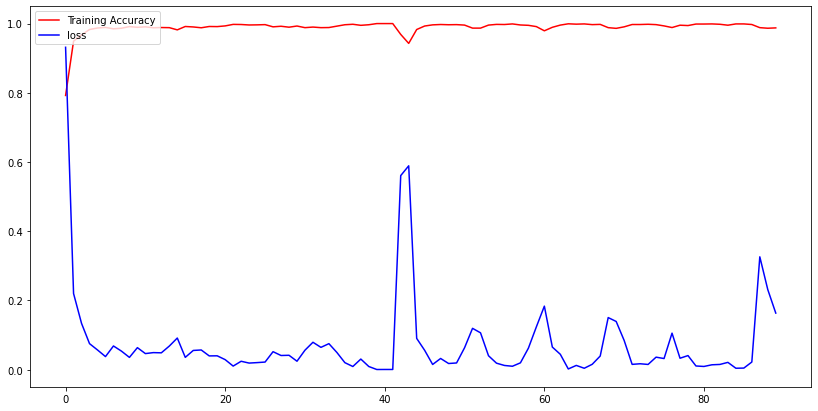

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
epochs = range(len(acc))
fig = plt.figure(figsize = (14,7))
plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, los, 'b', label = 'loss')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
train_result = model.evaluate(X_train, y_train_new)

93/93 [==============================] - 9s 87ms/step - loss: 0.1246 - accuracy: 0.9862


In [ ]:
val_result = model.evaluate(X_test,y_test_new)

no_augmented_df = pd.DataFrame(zip(train_result,val_result),columns=['Train','Val'],index=['Loss','Acc'])
no_augmented_df

11/11 [==============================] - 1s 130ms/step - loss: 0.8544 - accuracy: 0.9607


,Train,Val
Loss,0.124595,0.854374
Acc,0.986195,0.960725
